해시태그 칼럼의 데이터값으로 wordcloud

In [16]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

In [9]:
import re
import nltk
from konlpy.tag import Okt 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
df=pd.read_csv('./관광지정보최종.csv')

In [ ]:
df['해시태그_sub']=df['해시태그_sub'].apply(lambda x: x.strip())

In [ ]:
# 해시태그_sub 칼럼 데이터를 텍스트 파일로 저장하기
df['해시태그_sub'].to_csv('해시태그_sub.txt',index=False, header=False)

In [17]:
#  텍스트 파일 불러오기
with open ('해시태그_sub.txt','rb') as file:
    b_text = file.read()
    text = b_text.decode('utf-8')

텍스트 파일 전처리

In [18]:
sw = STOPWORDS

In [19]:
from konlpy.tag import Okt
okt = Okt()
tokens =okt.nouns(text)

In [20]:
# 영문자. 숫자. 구두점 제거
new_tokens = []
for token in tokens:
    item = re.sub('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','', token)
    if item:
        new_tokens.append(item)

In [21]:
text

'"일출,오름,경관,포토,부모,자연경관,포토스팟,유네스코,무장애관광,공영관광지"\r\n"섬속의섬,경관,포토,아이,맑음,자연경관,포토스팟,어린이,봄꽃,유채꽃,유네스코,무장애관광,공영관광지"\r\n"숲길,걷기,등산,친구,커플,흐림,봄,자연경관,도보여행,도보,숲,단풍,공영관광지"\r\n"경관,포토,커플,아이,맑음,겨울,힐링,자연경관,포토스팟,어린이,어트랙션,동백,수국,무장애관광,반려동물,반려동물동반입장,혼저옵서개,반려동물동반_관광지"\r\n"일몰,해수욕장,액티비티,아이,맑음,여름,자연경관,체험,레저,체험,해변,물놀이,어린이,수상레저,반려동물,반려동물동반입장,혼저옵서개,반려동물동반_해변,반려동물동반_자연,반려동물동반_관광지"\r\n"해수욕장,액티비티,아이,맑음,여름,자연경관,체험,레저,체험,해변,물놀이,어린이,수상레저,반려동물,반려동물동반입장,반려동물동반_해변,반려동물동반_자연,무장애관광,반려동물동반_관광지,2022_마을산책_봄,Moment_봄"\r\n"해변,경관,포토,커플,여름,자연경관,포토스팟,해수욕장"\r\n"오름,걷기,등산,친구,맑음,가을,우수관광사업체,자연경관,억새,무장애관광"\r\n"일몰,밤,오름,걷기,등산,아이,봄,자연경관,도보여행,도보,어린이,억새,반려동물,반려동물동반입장,반려동물동반_오름,반려동물동반_자연,반려동물동반_관광지"\r\n"일출,해변,경관,포토,커플,맑음,가을,자연경관,포토스팟,봄꽃,유채꽃,반려동물,반려동물동반입장,반려동물동반_관광지,무장애관광,공영관광지"\r\n"테마공원,커플,친구,부모,아이,혼자,맑음,휴식,힐링,녹차,실내관광지,어트랙션,반려동물,반려동물동반입장,반려동물동반_관광지,무장애관광"\r\n"산,걷기,등산,경관,포토,친구,사계절,자연경관,포토스팟,한라산,언택트,단풍,유네스코"\r\n"테마공원,부모,커플,혼자,친구,아이,맑음,흐림,미술,박물관,실내,실내관광지,어트랙션,봄꽃,벚꽃,무장애관광"\r\n"테마공원,아이,맑음,봄,가을,겨울,실내관광지,어린이,어트랙션,무장애관광,우수관광사업체"\r\n"일출,밤,오름,걷기,등산,친구,가을,자연경

In [28]:
stoptext = ''' 
혼 옵 개 액 티비 어 트랙 션 티 이드
'''

In [26]:
stop_words

['혼', '옵', '개', '액', '티비', '어', '트랙', '션', '티']

In [29]:
stop_words = stoptext.split()
new_tokens = [token for token in new_tokens if token not in stop_words]
new_tokens[:10]

['일출', '오름', '경관', '포토', '부모', '자연', '경관', '포토', '스팟', '유네스코']

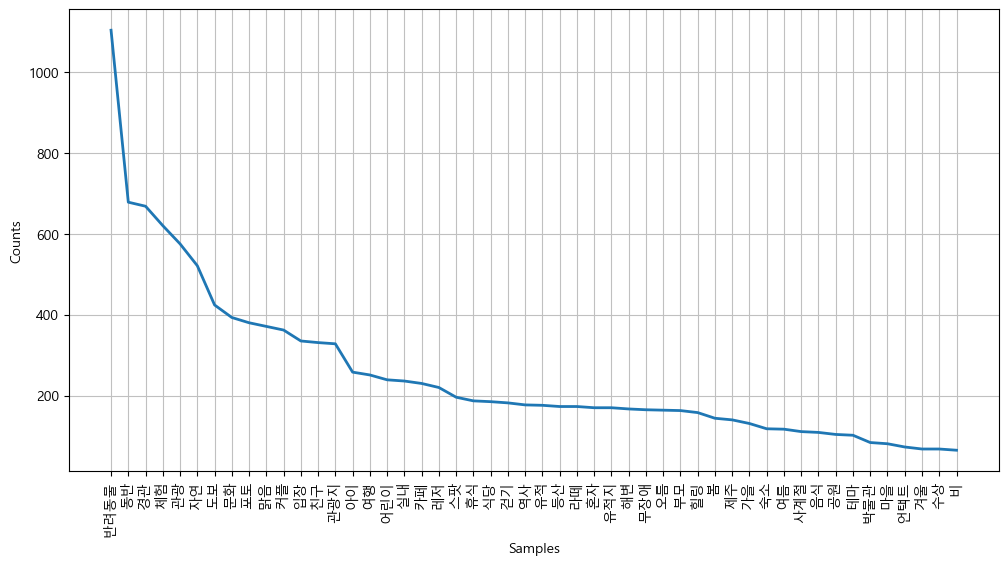

In [30]:
# 불용어 정리
# 불용어 제거 후 반복 
tag = nltk.Text(new_tokens, name='해시태그')
plt.figure(figsize=(12,6))
tag.plot(50)
plt.show()

In [23]:
tag


<Text: 해시태그>

In [31]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',
    background_color='white',
    max_words=200,
    # stopwords=
).generate(text)

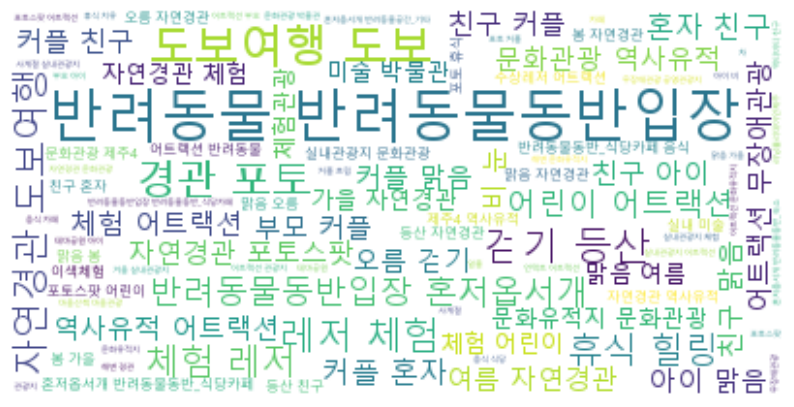

In [32]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
# 사용빈도 Top 30
count = 0
for key, val in wc.words_.items():
    print(f'{key} : \t{val}')
    count += 1
    if count >=30:
        break

반려동물 반려동물동반입장 : 	1.0
도보여행 도보 : 	0.6843853820598007
경관 포토 : 	0.5946843853820598
걷기 등산 : 	0.5647840531561462
자연경관 도보여행 : 	0.4950166112956811
레저 체험 : 	0.49169435215946844
휴식 힐링 : 	0.46511627906976744
체험 레저 : 	0.45182724252491696
반려동물동반입장 혼저옵서개 : 	0.4186046511627907
어린이 어트랙션 : 	0.3488372093023256
커플 혼자 : 	0.32558139534883723
혼자 친구 : 	0.3122923588039867
부모 커플 : 	0.2857142857142857
아이 맑음 : 	0.2724252491694352
친구 아이 : 	0.2724252491694352
커플 친구 : 	0.26245847176079734
자연경관 포토스팟 : 	0.2558139534883721
커플 맑음 : 	0.2558139534883721
문화관광 역사유적 : 	0.2425249169435216
역사유적 어트랙션 : 	0.23588039867109634
어트랙션 무장애관광 : 	0.23255813953488372
체험 어트랙션 : 	0.23255813953488372
친구 커플 : 	0.2292358803986711
오름 걷기 : 	0.21926910299003322
여름 자연경관 : 	0.20930232558139536
친구 맑음 : 	0.2026578073089701
비 눈 : 	0.19601328903654486
문화유적지 문화관광 : 	0.19601328903654486
맑음 여름 : 	0.19269102990033224
자연경관 체험 : 	0.19269102990033224


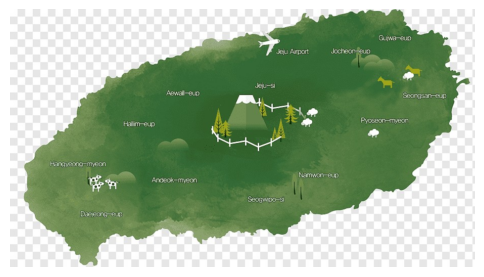

In [34]:
#  배경 그림위에 표시
mask = np.array(Image.open('제주_지도.jpg'))
plt.figure(figsize=(6,10))
plt.imshow(mask, cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')
plt.show()

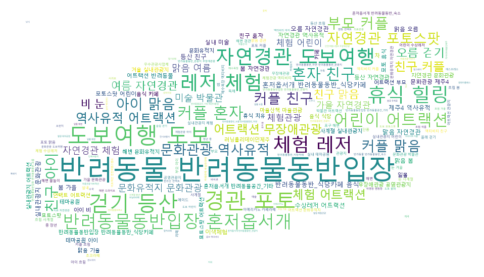

In [35]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',
    background_color="white",
    max_words=200,
    mask = mask
).generate(text)

plt.figure(figsize=(6,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()